In [3]:
import os
import sys
import matplotlib.pyplot as plt

sys.path.append('/Users/marcosgonzalez/Desktop/Circu/Circulacion-General-FCEN/modulo_oceano')
from funciones.cargar_salida_QG import *

dir_salidas = {
    "S1": "/Users/marcosgonzalez/Desktop/Circu/Practica 1/out_tmp_S1/",
    "S2": "/Users/marcosgonzalez/Desktop/Circu/Practica 1/out_tmp_S2/",
    "M1": "/Users/marcosgonzalez/Desktop/Circu/Practica 1/out_tmp_M1/",
    "M2": "/Users/marcosgonzalez/Desktop/Circu/Practica 1/out_tmp_M2/"
}


In [3]:
import numpy as np

def calcular_transporte_meridional(psi, dx):
    """
    Calcula el transporte meridional a partir de la función corriente.
    psi: matriz de función corriente
    dx: distancia entre puntos en la dirección x, en metros
    """
    # Derivada zonal de la función corriente y conversión a Sverdrups (1 Sv = 1e6 m^3/s)
    My = -np.gradient(psi, axis=1) / dx * 1e-6
    return My


In [5]:
import matplotlib.pyplot as plt

def plot_campos(X, Y, campo, titulo, xlabel, ylabel, cbar_label):
    """
    Función genérica para graficar campos 2D.
    """
    plt.figure(figsize=(10, 5))
    contourf = plt.contourf(X, Y, campo, levels=np.linspace(np.min(campo), np.max(campo), 100), cmap='viridis')
    cbar = plt.colorbar(contourf)
    cbar.set_label(cbar_label)
    plt.title(titulo)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

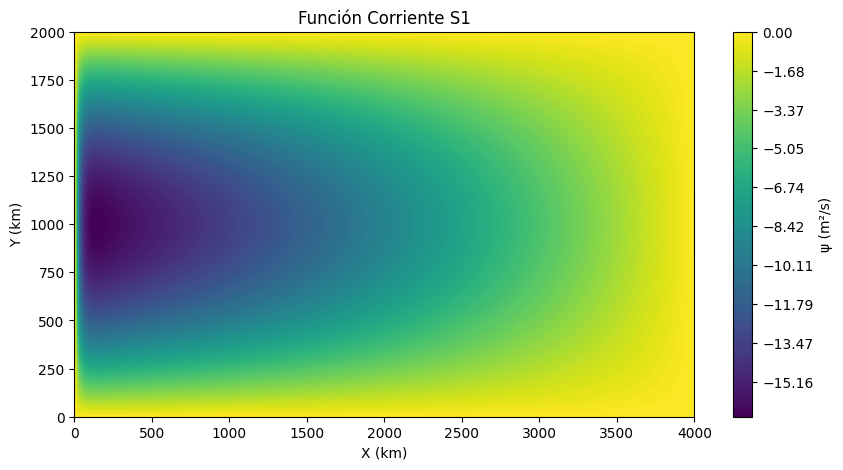

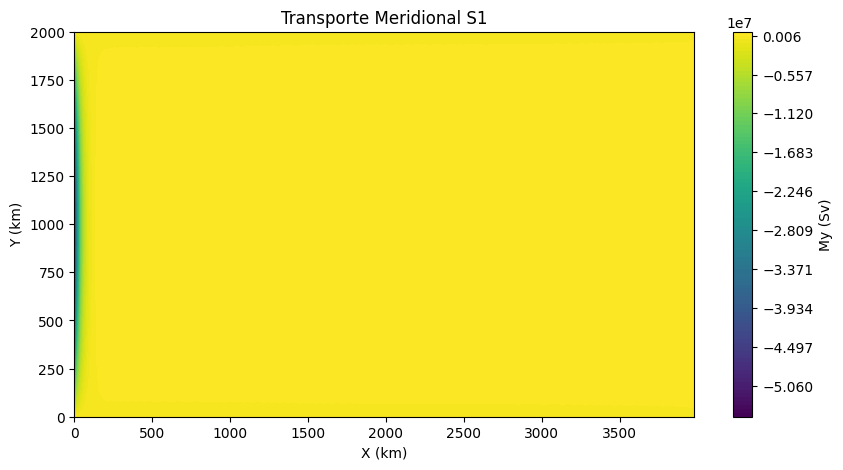

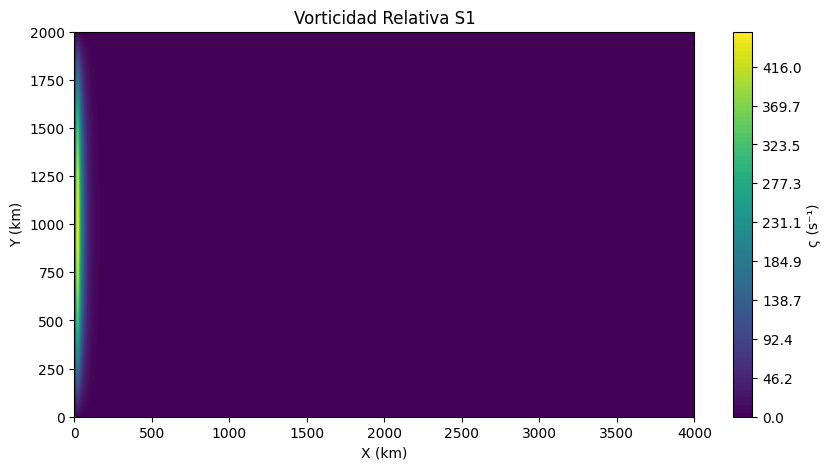

Modelo de Stommel S1: Exhibe características Y.


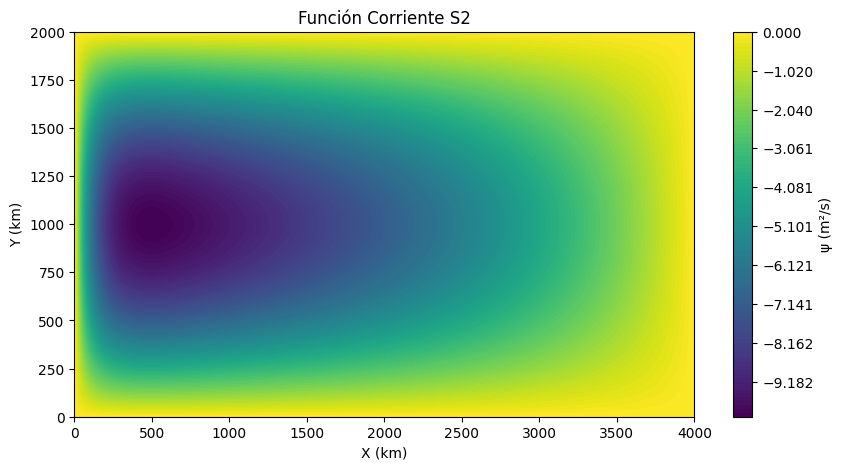

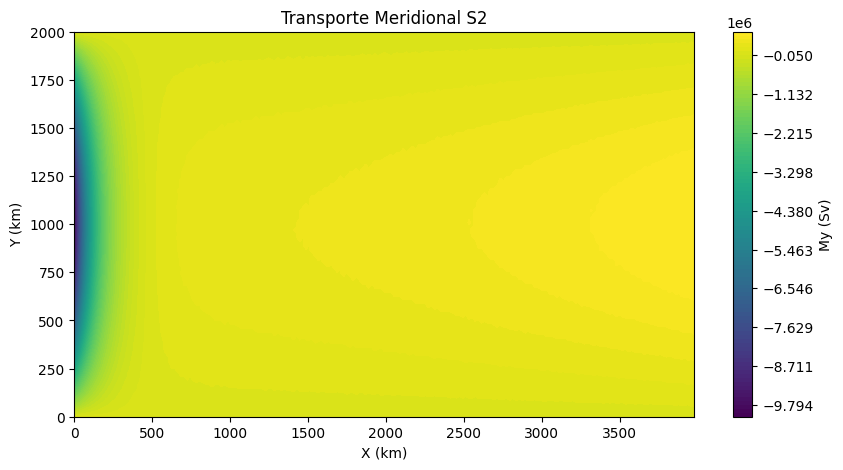

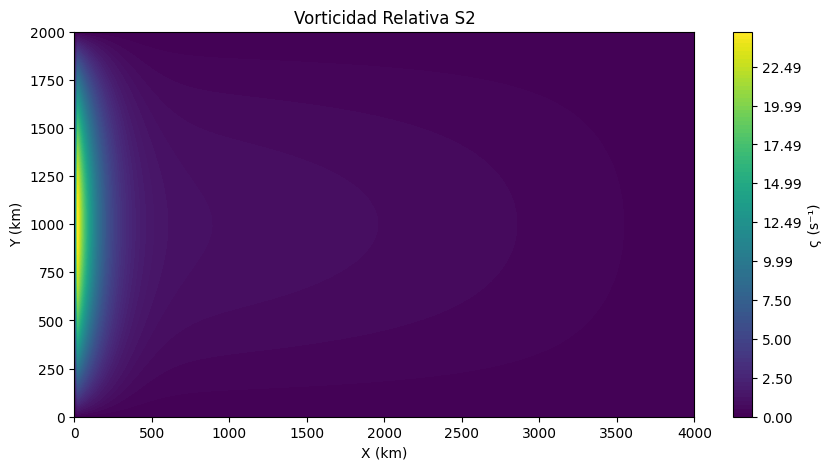

Modelo de Stommel S2: Exhibe características Y.


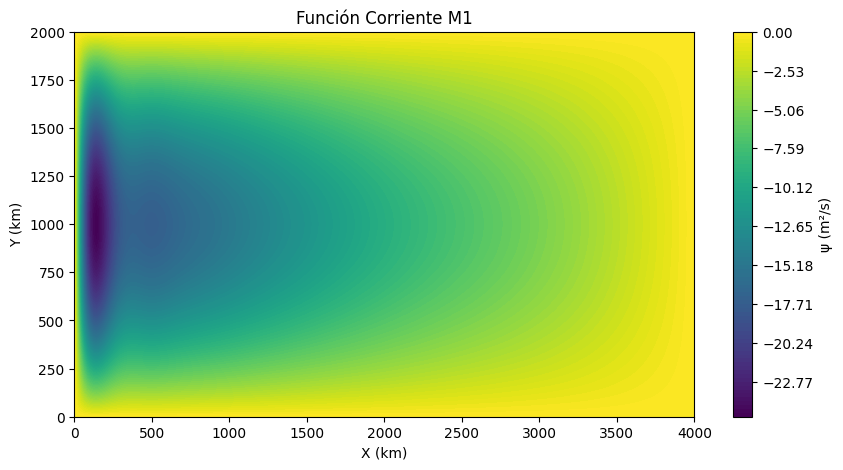

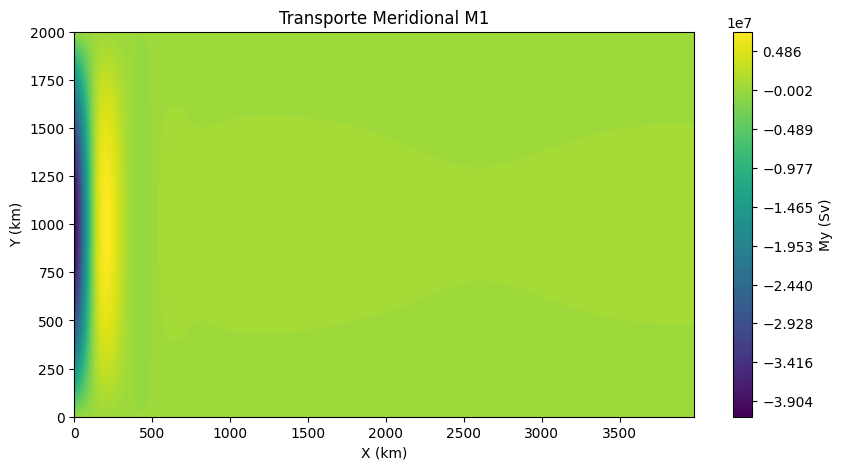

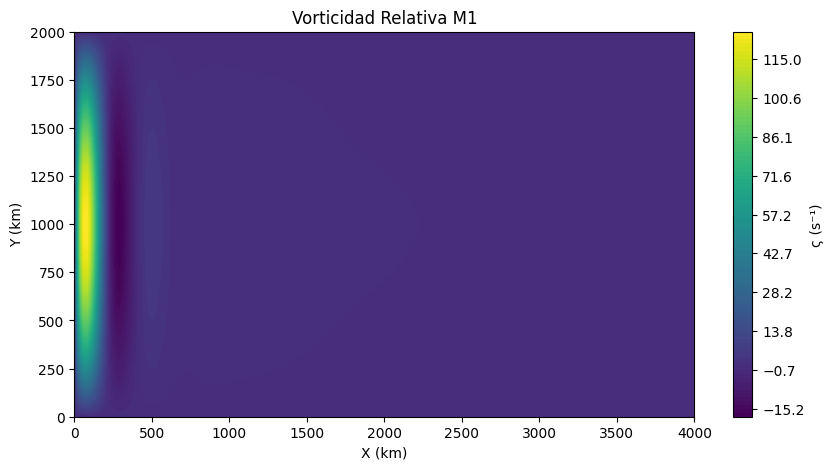

Modelo de Munk M1: Exhibe características X.


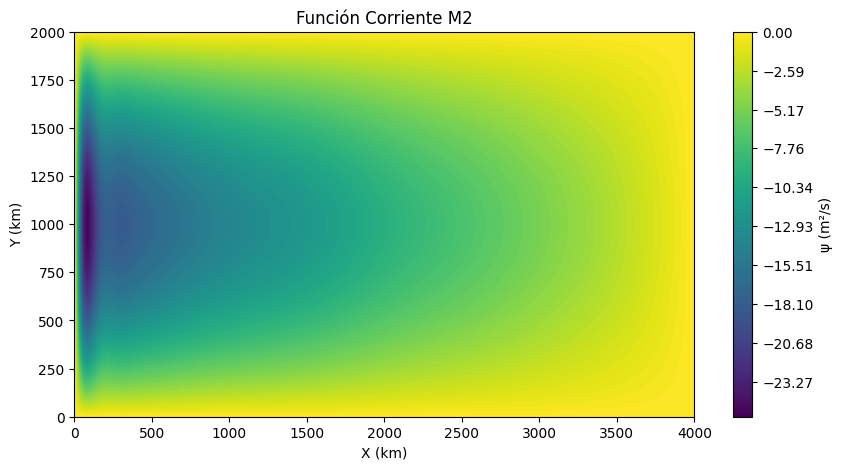

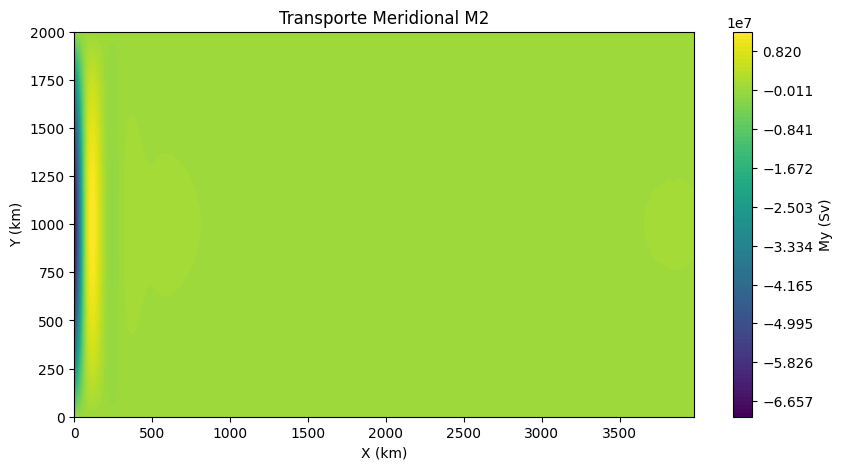

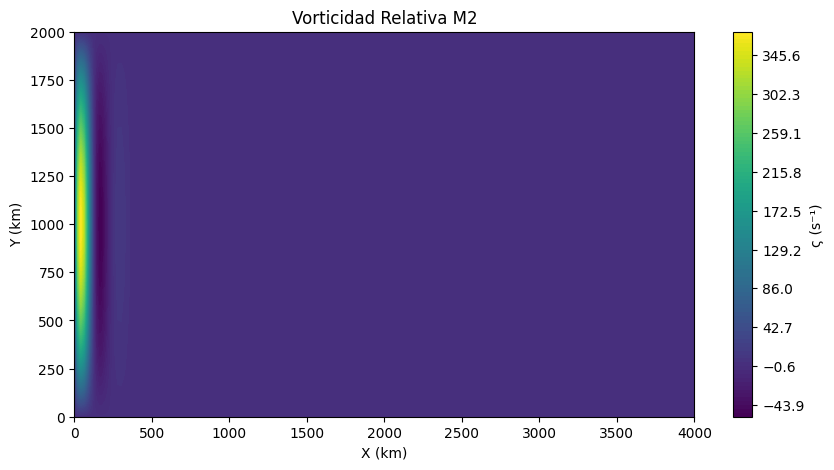

Modelo de Munk M2: Exhibe características X.


In [11]:
import numpy as np
import math

# Escalas típicas
tau = 0.25          # Tensión del viento [N/m^2]
L = 4000000         # Longitud de la cuenca [m]
D = 2500            # Profundidad [m]
beta = 2e-11        # Coeficiente de Coriolis [1/(s*m)]
rho = 1025          # Densidad [kg/m^3]

# Parámetros para la dimensionalización
U = (2*math.pi*tau)/(rho*D*beta*L)                              # Velocidad
Ro = (2*math.pi*tau)/(rho*D*(math.pow(beta,2)*(math.pow(L,3)))) # Número de Rossby

# Dimensiones del modelo en metros (suponemos que Lx y Ly están en kilómetros)
# dx = 4000000 / 199  # Asumiendo 200 puntos en la cuenca, se usa 199 intervalos
# dy = 2000000 / 99   # Asumiendo 100 puntos en la cuenca

for nombre, dir_salida in dir_salidas.items():
    datos_modelo = cargar(dir_salida, 4000, 2000, 200, 100)
    psiF = datos_modelo[2]  # Función corriente en el tiempo final
    vortF = datos_modelo[3]  # Vorticidad en el tiempo final
    X, Y = datos_modelo[6], datos_modelo[7]  # Coordenadas X y Y

    # Adimensionalizar las variables
    psiadim = psiF / (U * L)
    vortadim = vortF / (U / L)

    # Dimensionalizar la función corriente y la vorticidad
    psidim = psiadim * U * L
    vortdim = vortadim * U / L

    # Calcular el transporte meridional adimensional y luego dimensionalizar
    trans_mer_adim = np.diff(psiadim, n=1, axis=1) * D
    trans_mer_dim = trans_mer_adim * U * D * L 
    
    # Graficar los campos dimensionalizados
    plot_campos(X, Y, psidim, f'Función Corriente {nombre}', 'X (km)', 'Y (km)', 'ψ (m²/s)')
    plot_campos(X[:-1], Y, trans_mer_dim, f'Transporte Meridional {nombre}', 'X (km)', 'Y (km)', 'My (Sv)')
    plot_campos(X, Y, vortdim, f'Vorticidad Relativa {nombre}', 'X (km)', 'Y (km)', 'ς (s⁻¹)')

    # Notas de comparación
    if 'M' in nombre:
        print(f"Modelo de Munk {nombre}: Exhibe características X.")
    else:
        print(f"Modelo de Stommel {nombre}: Exhibe características Y.")


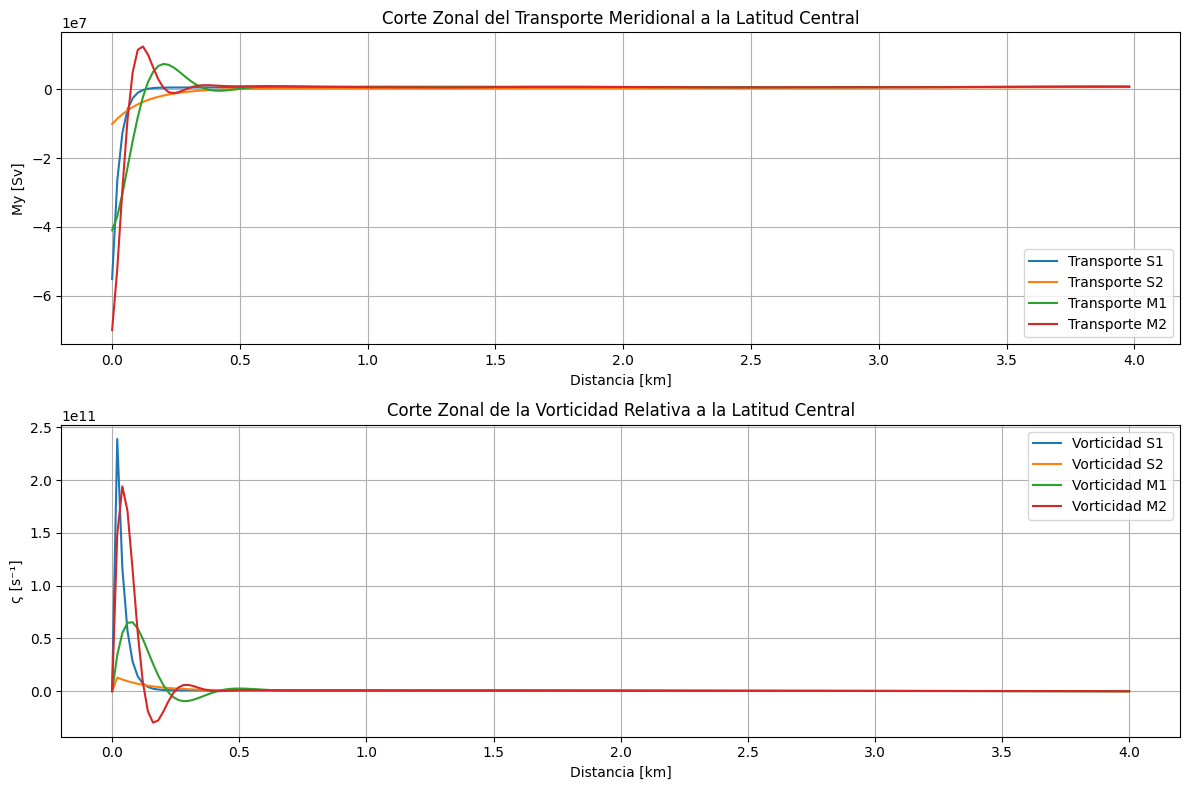

In [13]:
# Escoger la latitud central
lat_central_idx = Y.shape[0] // 2  # Índice de la latitud central

# Crear una figura para los gráficos
plt.figure(figsize=(12, 8))

# Graficar el corte zonal del transporte meridional
plt.subplot(2, 1, 1)
for nombre, dir_salida in dir_salidas.items():
    datos_modelo = cargar(dir_salida, 4000, 2000, 200, 100)
    psiF = datos_modelo[2]  # Función corriente en el tiempo final
    vortF = datos_modelo[3]  # Vorticidad en el tiempo final
    X, Y = datos_modelo[6], datos_modelo[7]  # Coordenadas X y Y

    # Calcular el transporte meridional adimensional y luego dimensionalizar
    trans_mer_adim = np.diff(psiF / (U * L), n=1, axis=1) * D
    trans_mer_dim = trans_mer_adim * U * D * L

    # Extraer el corte zonal en la latitud central
    corte_zonal_trans_mer = trans_mer_dim[lat_central_idx, :]
    
    # Graficar
    plt.plot(X[:-1] / 1000, corte_zonal_trans_mer, label=f'Transporte {nombre}')

plt.title('Corte Zonal del Transporte Meridional a la Latitud Central')
plt.xlabel('Distancia [km]')
plt.ylabel('My [Sv]')
plt.legend()
plt.grid(True)

# Graficar el corte zonal de la vorticidad relativa
plt.subplot(2, 1, 2)
for nombre, dir_salida in dir_salidas.items():
    datos_modelo = cargar(dir_salida, 4000, 2000, 200, 100)
    vortF = datos_modelo[3]  # Vorticidad en el tiempo final
    X, Y = datos_modelo[6], datos_modelo[7]  # Coordenadas X y Y

    # Dimensionalizar la vorticidad relativa
    vortdim = vortF / (U / L)

    # Extraer el corte zonal en la latitud central
    corte_zonal_vort = vortdim[lat_central_idx, :]

    # Graficar
    plt.plot(X / 1000, corte_zonal_vort, label=f'Vorticidad {nombre}')

plt.title('Corte Zonal de la Vorticidad Relativa a la Latitud Central')
plt.xlabel('Distancia [km]')
plt.ylabel('ς [s⁻¹]')
plt.legend()
plt.grid(True)

# Mostrar los gráficos
plt.tight_layout()
plt.show()
